In [410]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Metodo de Newton Raphson

In [411]:
# Define la función f y la variable x
x = sp.Symbol('x')
f = sp.cos(x) - x

# Definir valor inicial, tolerancia y número máximo de iteraciones
x0 = 3
tol = 1e-6
max_iter = 1000

# Calcula la derivada de la función f
df = sp.diff(f, x)

# Inicializa la variable x con el valor inicial x0
x_val = x0

# Almacena información sobre cada iteración para graficarla más tarde
iter_data = [(x0, f.evalf(subs={x: x0}))]

# Itera hasta que se alcance la tolerancia o el número máximo de iteraciones
for i in range(max_iter):
    # Evalúa la función y la derivada en el valor actual de x
    fx = f.evalf(subs={x: x_val})
    dfx = df.evalf(subs={x: x_val})
    
    # Calcula el siguiente valor de x utilizando el método de Newton-Raphson
    x_val = x_val - fx/dfx
    
    # Almacena información sobre cada iteración para graficarla más tarde
    iter_data.append((x_val, fx))
    
    # Si se alcanza la tolerancia, imprime el resultado y sale del bucle
    if abs(fx) < tol:
        print(f"La raíz es aproximadamente {x_val}")
        break
    
    # Imprime información sobre la iteración actual
    print(f"Iteración {i}: x={x_val}")

Iteración 0: x=-0.496558178297332
Iteración 1: x=2.13100384448100
Iteración 2: x=0.689662720778373
Iteración 3: x=0.739652997531334
Iteración 4: x=0.739085204375836
La raíz es aproximadamente 0.739085133215162


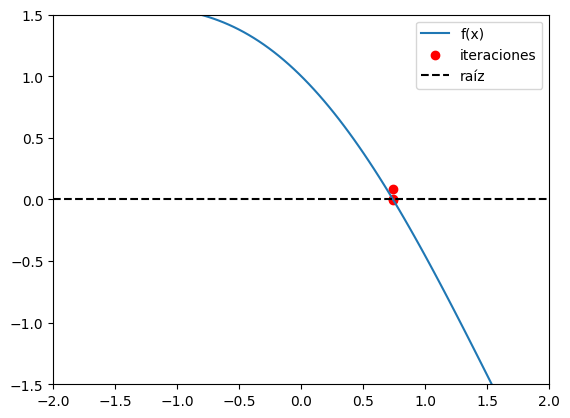

In [412]:
# Crea una gráfica de la función f
x_vals = np.linspace(-2, 2, 100)
y_vals = [f.evalf(subs={x: x_val}) for x_val in x_vals]
plt.plot(x_vals, y_vals, label='f(x)')

# Agrega puntos para cada iteración
x_iter = [x_val for x_val, fx in iter_data]
y_iter = [fx for x_val, fx in iter_data]
plt.scatter(x_iter, y_iter, color='red', label='iteraciones')

# Agrega una línea para mostrar la raíz encontrada
plt.axhline(y=0, color='black', linestyle='--', label='raíz')

# Ajusta los límites de la gráfica y agrega leyendas
plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

# Metodo del Secante

In [413]:
# Define la función que deseas resolver
f = lambda x: np.cos(x) - x

# Define los valores iniciales de x0 y x1
x0 = 0
x1 = 1

# Define la tolerancia y el número máximo de iteraciones
tolerancia = 1e-6
iteraciones_maximas = 1000

# Crea una lista para almacenar las raíces, los valores de la función y los errores en cada iteración
raices = []
valores = []
errores = []

# Implementa el método de la secante
for iteracion in range(iteraciones_maximas):
    fx0 = f(x0)
    fx1 = f(x1)
    x_val = x1 - ((x1-x0)/(fx1-fx0)) *fx1
    
    error = abs((x_val-x1)/x_val)
    
    raices.append(x_val)
    valores.append(fx1)
    errores.append(error)
    
    print(f"Iteración {iteracion}: x={x_val}, error={error}")
    
    x0 = x1
    x1 = x_val
    
    if error < tolerancia:
        break

# Imprime el resultado final
print("El valor de x que satisface la función es: ", x_val)


Iteración 0: x=0.6850733573260451, error=0.45969769413186023
Iteración 1: x=0.736298997613654, error=0.06957179142390695
Iteración 2: x=0.7391193619116293, error=0.003815844156322459
Iteración 3: x=0.7390851121274639, error=4.634078484797597e-05
Iteración 4: x=0.7390851332150012, error=2.8531946368906678e-08
El valor de x que satisface la función es:  0.7390851332150012


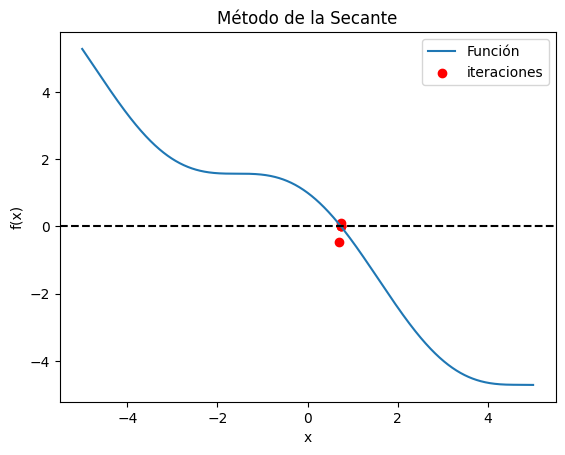

In [414]:
# Crea una gráfica de la función y la progresión del método de la secante
x = np.linspace(-5, 5, 1000)
y = f(x)
plt.plot(x, y, label='Función')
plt.scatter(raices, valores, c='red', label='iteraciones')
plt.legend()
plt.xlabel('x')
plt.axhline(y=0, color='black', linestyle='--', label='raíz')
plt.ylabel('f(x)')
plt.title('Método de la Secante')
plt.show()